In [53]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords

import numpy as np
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
%matplotlib inline

# Step 1) Import Data

In [54]:
# get data from Sklearn testing sets
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
Small_words_dataset = newsgroups_train.data
small_labels_dataset = newsgroups_train.target

df_small_text = pd.DataFrame(Small_words_dataset)
df_small_label = pd.DataFrame(small_labels_dataset)

df_small = pd.concat([df_small_text,df_small_label],1)
df_small.columns = ['Article_Text','Article_Label']

In [62]:
# for prototypeing purposes make a small dataset
Small_words_dataset = newsgroups_train.data
small_labels_dataset = newsgroups_train.target

df_small_text = pd.DataFrame(Small_words_dataset)
df_small_label = pd.DataFrame(small_labels_dataset)

df_small = pd.concat([df_small_text,df_small_label],1)
df_small.columns = ['Article_Text','Article_Label']

# Make dataset smaller
#df_small = df_small.sample(frac=0.1)

# Step 2) Convert Data Into Features

In [63]:
# strip formatting from text and comments
import re, string

# strip words on the same row as introductory text and comments
comments = re.compile('>.*\n|.+: .*\n|.+writes:\n|\n')

In [64]:
# replace the text with decommented text
df_small.Article_Text = df_small.Article_Text.replace(comments,' ')

# lowercase
df_small.Article_Text = df_small.Article_Text.str.lower()

# tokenise
df_small.Article_Text = df_small.Article_Text.replace("'","")
df_small.Article_Text = df_small.Article_Text.replace("[^0-9a-z]+"," ",regex=True)

# view
df_small.Article_Text[:5]

0     i was wondering if anyone out there could enl...
1     a fair number of brave souls who upgraded the...
2     well folks my mac plus finally gave up the gh...
3     robert j c kyanko rob rjck uucp wrote do you ...
4     from article c5owcb n3p world std com my unde...
Name: Article_Text, dtype: object

# Step 3) Vectorise sentances

In [65]:
# tiny dataset for vector test
tiny_dataset = df_small.copy()

In [66]:
tiny_dataset.Article_Text = tiny_dataset.Article_Text.astype(str)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
# create basic word vectors
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(tiny_dataset.Article_Text)
vectors.shape

(11314, 99899)

In [69]:
# turn vectors into dataframe 
df_small_with_vectors = pd.DataFrame(vectors.toarray())

# append the labeles
df_small_with_vectors['Labels'] = tiny_dataset.Article_Label.values

# view
df_small_with_vectors[:4]

,0,1,2,3,4,5,6,7,8,9,...,99890,99891,99892,99893,99894,99895,99896,99897,99898,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Test

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_small_with_vectors.iloc[:,:-1], df_small_with_vectors.iloc[:,-1], test_size=0.4, random_state=0)



In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


clf = MultinomialNB(alpha=.01)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
metrics.f1_score(y_test, pred, average='macro')


0.79144090515976484

# PCA

pca will speed up the predictive algorithums during testing

In [39]:
pca = PCA(n_components=50)
pca.fit(df_small_with_vectors.iloc[:,:-1])

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
df_small_with_vectors_pca = pd.DataFrame(pca.transform(df_small_with_vectors.iloc[:,:-1]))

In [41]:
# append the labeles
df_small_with_vectors_pca['Labels'] = df_small.Article_Label.values

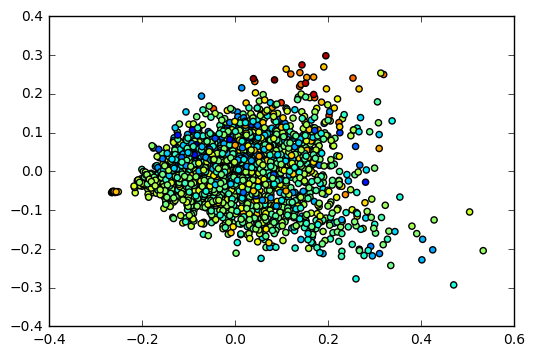

In [42]:
X = df_small_with_vectors_pca.iloc[:,0]
Y = df_small_with_vectors_pca.iloc[:,1]
cols = df_small_with_vectors_pca.iloc[:,2]

plt.scatter(X,Y,c=cols)
plt.show()

In [43]:
sum(pca.explained_variance_)

0.1142638448595133

In [44]:
df_small_with_vectors_pca.shape

(2823, 51)

# T-SNE

In [45]:
# T-sne
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(df_small_with_vectors.head(1000).iloc[:,:-1])
X_embedded.shape


(1000, 2)

In [46]:
T_sne_dataset = pd.DataFrame(X_embedded)
T_sne_dataset['labels'] = df_small.head(1000).Article_Label.values

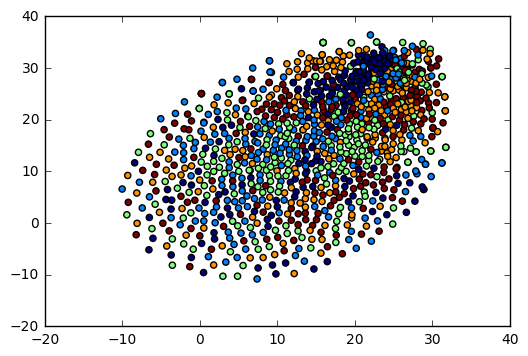

In [47]:
X = T_sne_dataset.iloc[:,0]
Y = T_sne_dataset.iloc[:,1]
cols = T_sne_dataset.iloc[:,2]

plt.scatter(X,Y,c=cols)
plt.show()